
https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler, FunctionTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.inspection import permutation_importance

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



El problema de rotación de personal sucede cuando un empleado sale de una organización por cualquier razón, ya sea voluntaria o involuntariamente, y este no es inmediatamente reemplazado. Usualmente sucede cuando se automatiza o llegan nuevas tecnologías que remplazan a los empleados.

Altas tasas de rotación de personal implica altos costos para las organizaciones en recrutar y entrenar nuevos empleados, además de impactar la moral debido a la incertidumbre relacionada a la estabilidad laboral en la organización.



> AIHR. Suzanne Lucas (n.d.). Employee attrition. Retrieved on may 10th 2024, from https://www.aihr.com/blog/employee-attrition/#:~:text=Employee%20attrition%20refers%20to%20long,even%20if%20the%20business%20grows.


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Maestría en Inteligencia Artificial Aplicada (MNA)/Timestre ABR-JUL 2024/Inteligencia Artificial y Modelos de Aprendizaje/Semana 3 y 4/data.csv")

print("Tamaño del DataFrame:", df.shape)
df.describe(include = 'all').T

Tamaño del DataFrame: (1470, 35)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1470.0,NaN,NaN,NaN,36.92381,9.135373,18.0,30.0,36.0,43.0,60.0
Attrition,1470,2,No,1233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BusinessTravel,1470,3,Travel_Rarely,1043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DailyRate,1470.0,NaN,NaN,NaN,802.485714,403.5091,102.0,465.0,802.0,1157.0,1499.0
Department,1470,3,Research & Development,961,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DistanceFromHome,1470.0,NaN,NaN,NaN,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0
Education,1470.0,NaN,NaN,NaN,2.912925,1.024165,1.0,2.0,3.0,4.0,5.0
EducationField,1470,6,Life Sciences,606,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeCount,1470.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
EmployeeNumber,1470.0,NaN,NaN,NaN,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0


In [ ]:
df = df.drop(['Over18','EmployeeCount','StandardHours','EmployeeNumber'],axis=1)
print("Tamaño del nuevo DataFrame:", df.shape)

Tamaño del nuevo DataFrame: (1470, 31)


In [ ]:
variable_int = df.select_dtypes(include=['int64']).columns
variable_float = df.select_dtypes(include=['float64']).columns

variable_binaria = {}
for column in df.columns:
    valores_unicos = df[column].unique()
    if len(valores_unicos) == 2:
        variable_binaria[column] = valores_unicos

variable_cat_nom = {}
for column in df.columns:
    if df[column].dtype == 'object':
        unique_catnom = df[column].nunique()
        if unique_catnom > 1:
            variable_cat_nom[column] = unique_catnom

print(f"Las variables numéricas de valor entero son: {variable_int.tolist()}, Con un total de: {len(variable_int)} variables")
print(f"Las variables numéricas de valor real (flotante) son: {variable_float}, Con un total de: {len(variable_float)} variables")
print("Variables binarias encontradas:")
for variable, values in variable_binaria.items():
    print(f"{variable}: {values}")
print("Variables categóricas nominales y sus niveles:")
for variable, levels in variable_cat_nom.items():
    print(f"{variable}: {levels} niveles")
print("Variables categóricas ordinales: 1. BusinessTravel")

Las variables numéricas de valor entero son: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'], Con un total de: 23 variables
Las variables numéricas de valor real (flotante) son: Index([], dtype='object'), Con un total de: 0 variables
Variables binarias encontradas:
Attrition: ['Yes' 'No']
Gender: ['Female' 'Male']
OverTime: ['Yes' 'No']
PerformanceRating: [3 4]
Variables categóricas nominales y sus niveles:
Attrition: 2 niveles
BusinessTravel: 3 niveles
Department: 3 niveles
EducationField: 6 niveles
Gender: 2 niveles
JobRole: 9 niveles
MaritalStatus: 3 niveles
OverTime: 2 niveles
Variables categó

In [ ]:

X = df.drop('Attrition', axis=1)
y = df['Attrition']

Xtrain, Xtemp, ytrain, ytemp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
Xval, Xtest, yval, ytest = train_test_split(Xtemp, ytemp, test_size=0.5, stratify=ytemp, random_state=42)
print("Dimensiones de los conjuntos:")
print("X_train:", Xtrain.shape)
print("X_val:", Xval.shape)
print("X_test:", Xtest.shape)
print("y_train:", ytrain.shape)
print("y_val:", yval.shape)
print("y_test:", ytest.shape)


Dimensiones de los conjuntos:
X_train: (1029, 30)
X_val: (220, 30)
X_test: (221, 30)
y_train: (1029,)
y_val: (220,)
y_test: (221,)


In [ ]:
le = LabelEncoder()
ytrain = le.fit_transform(ytrain)
yval =  le.fit_transform(yval)
ytest = le.fit_transform(ytest)

def display_class_proportions(y, label):
    unique, counts = np.unique(y, return_counts=True)
    proportions = counts / counts.sum()
    print(f"Proporciones de clases en {label}:")
    for label, proportion in zip(unique, proportions):
        print(f"Clase {label} ({le.inverse_transform([label])[0]}): {proportion:.2f}")


display_class_proportions(ytrain, 'ytrain')
display_class_proportions(yval, 'yval')
display_class_proportions(ytest, 'ytest')

Proporciones de clases en ytrain:
Clase 0 (No): 0.84
Clase 1 (Yes): 0.16
Proporciones de clases en yval:
Clase 0 (No): 0.84
Clase 1 (Yes): 0.16
Proporciones de clases en ytest:
Clase 0 (No): 0.84
Clase 1 (Yes): 0.16


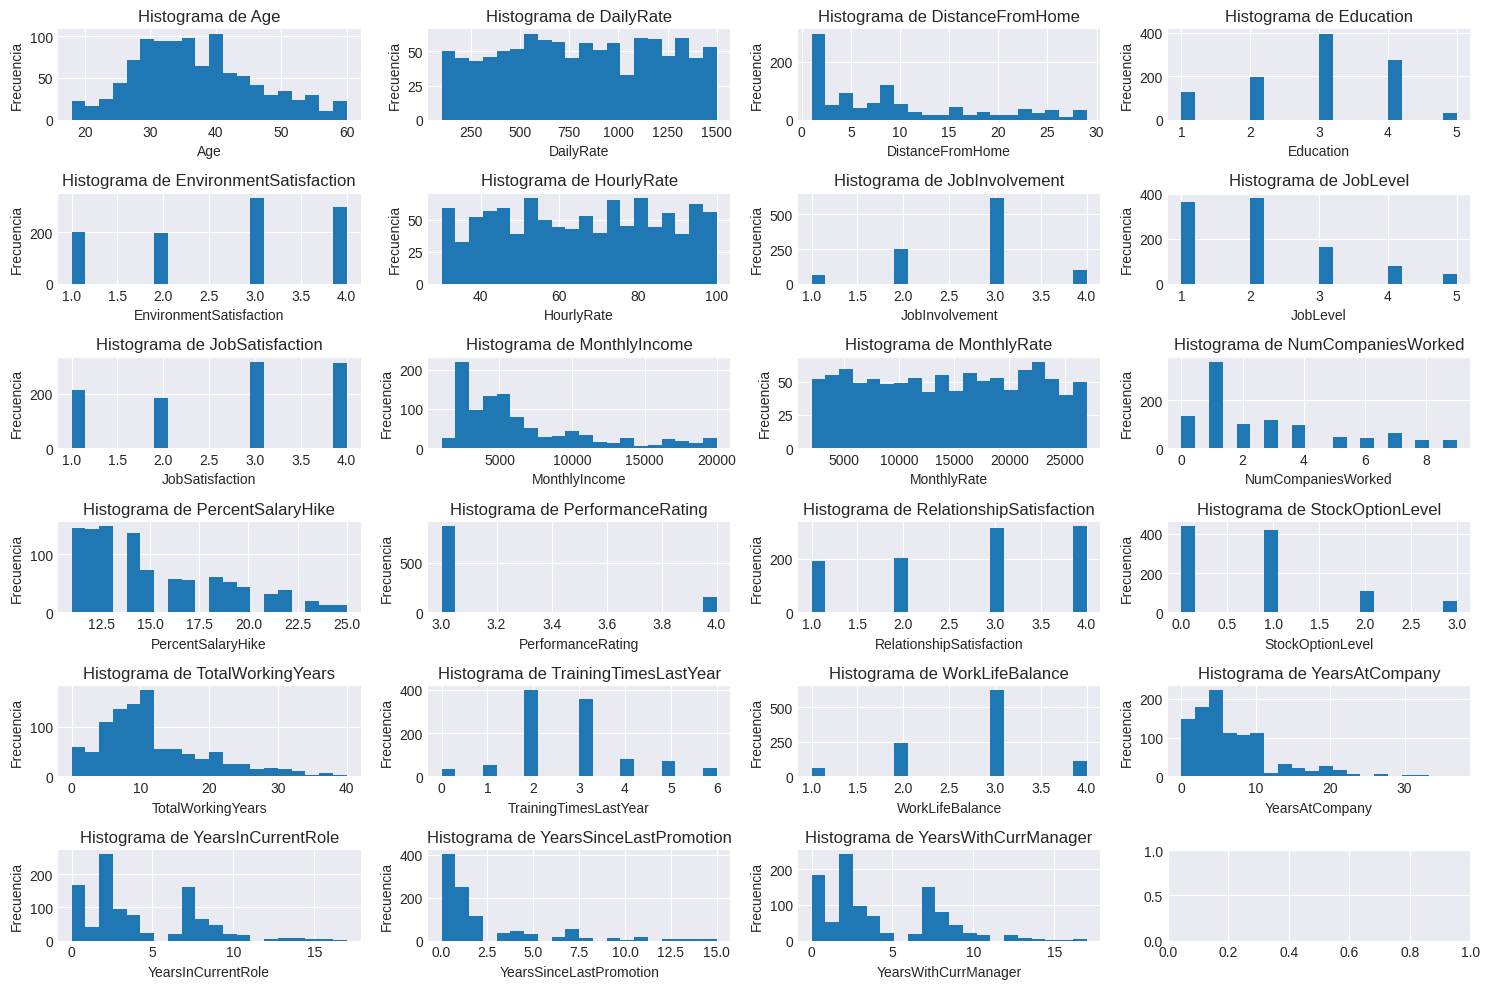

Se pueden utilizar técnicas de transformación como MinMaxScaler, Estandarización o Normalización inicialmente, sobretodo para tratar con sesgos en la distribución de los datos


In [ ]:
num_columns = Xtrain.select_dtypes(include=['int']).columns
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(15, 10))
axes = axes.flatten()
for idx, col in enumerate(num_columns):
    ax = axes[idx]
    Xtrain[col].hist(bins=20, ax=ax)
    ax.set_title(f'Histograma de {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frecuencia')
    ax.grid
plt.tight_layout()
plt.show()

print("Se pueden utilizar técnicas de transformación como MinMaxScaler, Estandarización o Normalización inicialmente, sobretodo para tratar con sesgos en la distribución de los datos")

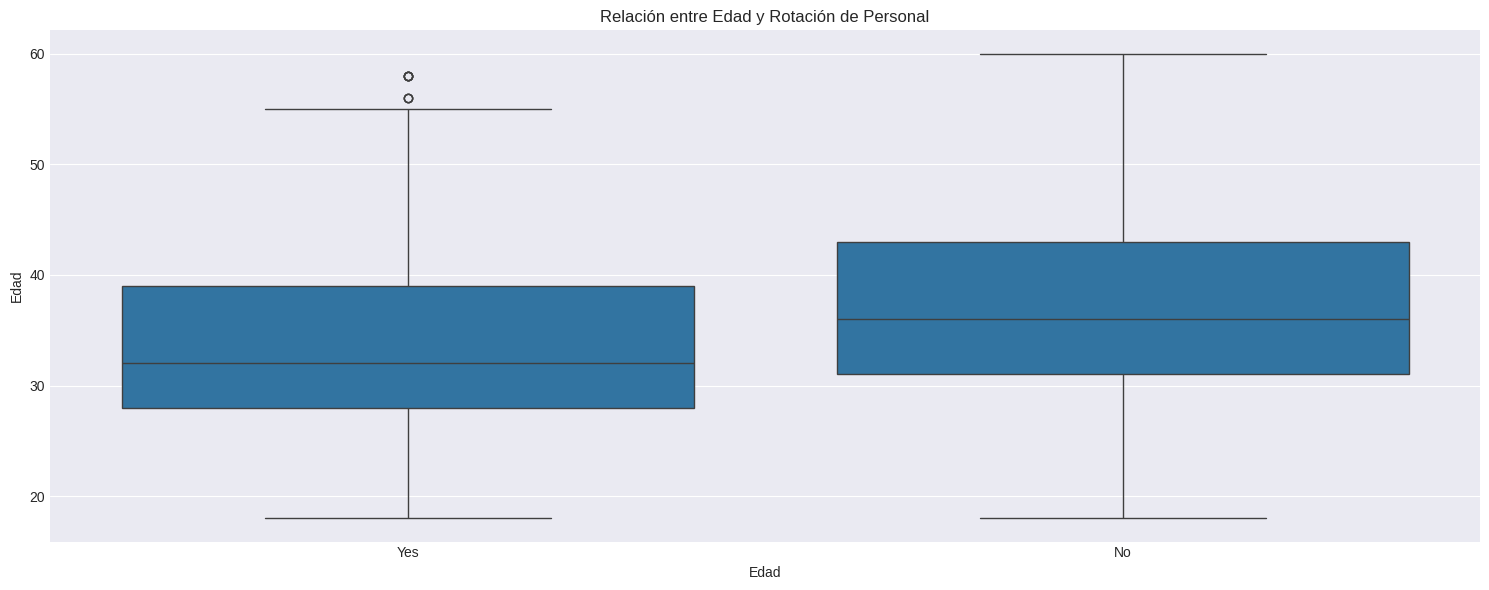

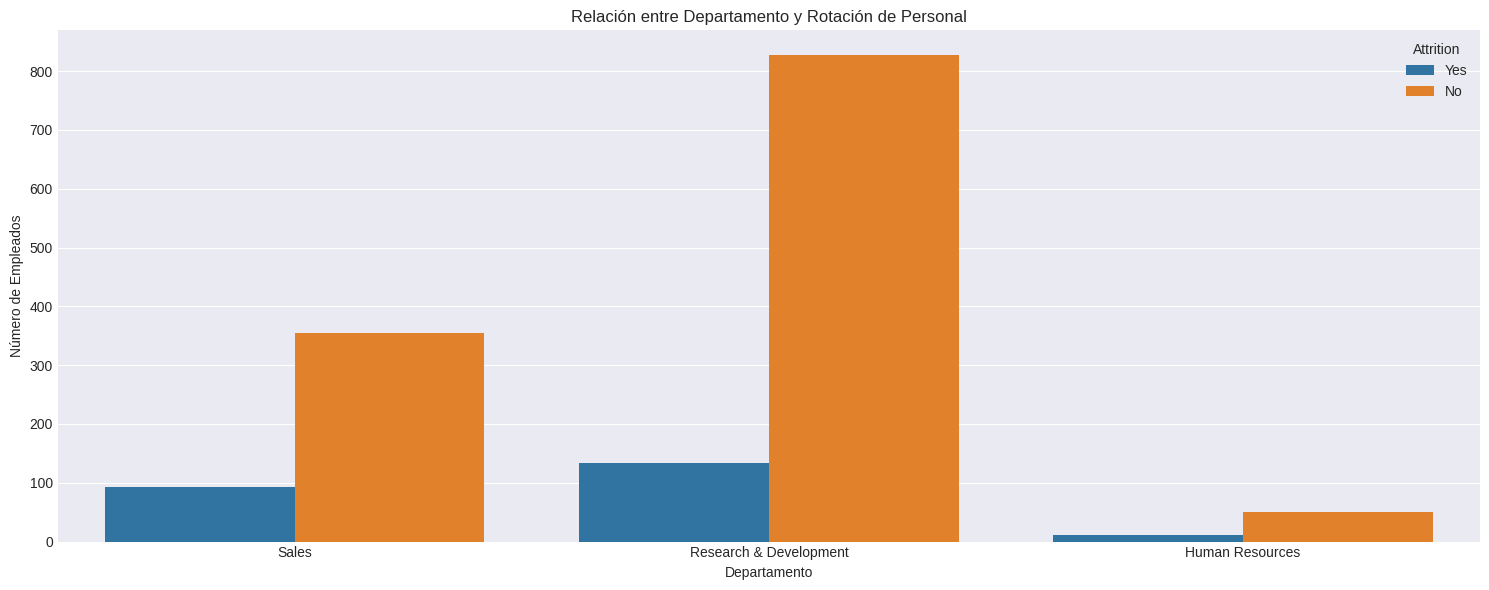

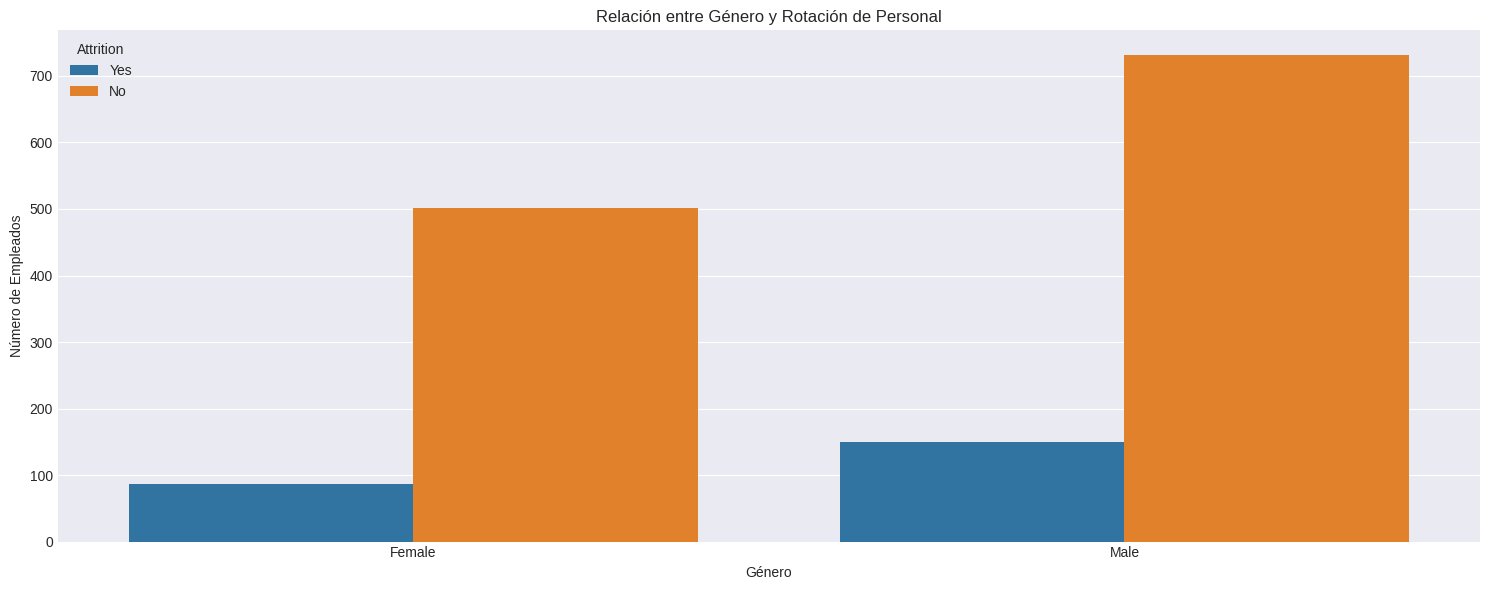

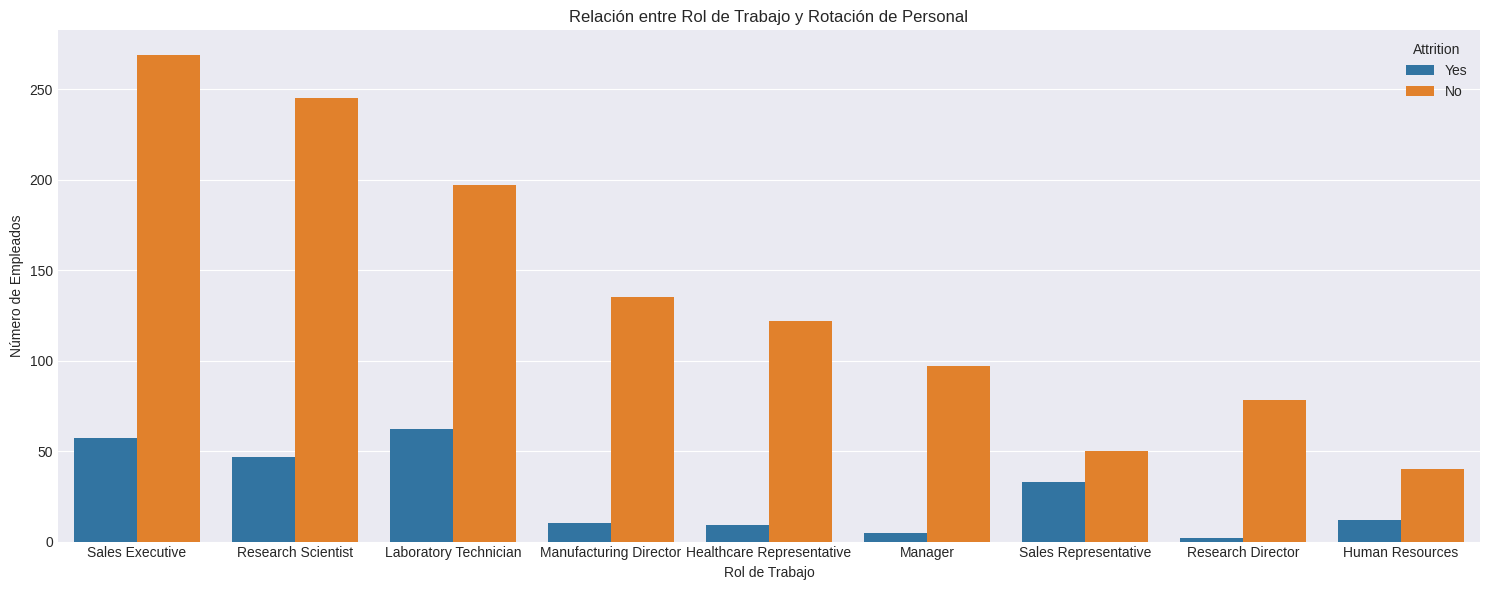

In [ ]:
def attrition_relationships(df):
    features = [('Age', 'boxplot', 'Edad'), ('Department', 'countplot', 'Departamento'),
                ('Gender', 'countplot', 'Género'), ('JobRole', 'countplot', 'Rol de Trabajo')]

    for feature, plot_type, label in features:
        plt.figure(figsize=(15, 6))
        if plot_type == 'boxplot':
            sns.boxplot(x='Attrition', y=feature, data=df)
        else:
            sns.countplot(x=feature, hue='Attrition', data=df)
            plt.xticks(rotation=45 if feature == 'JobSatisfaction' else 0)

        plt.title(f'Relación entre {label} y Rotación de Personal')
        plt.xlabel(label)
        plt.ylabel('Número de Empleados' if plot_type == 'countplot' else label)
        plt.tight_layout()
        plt.show()

attrition_relationships(df)

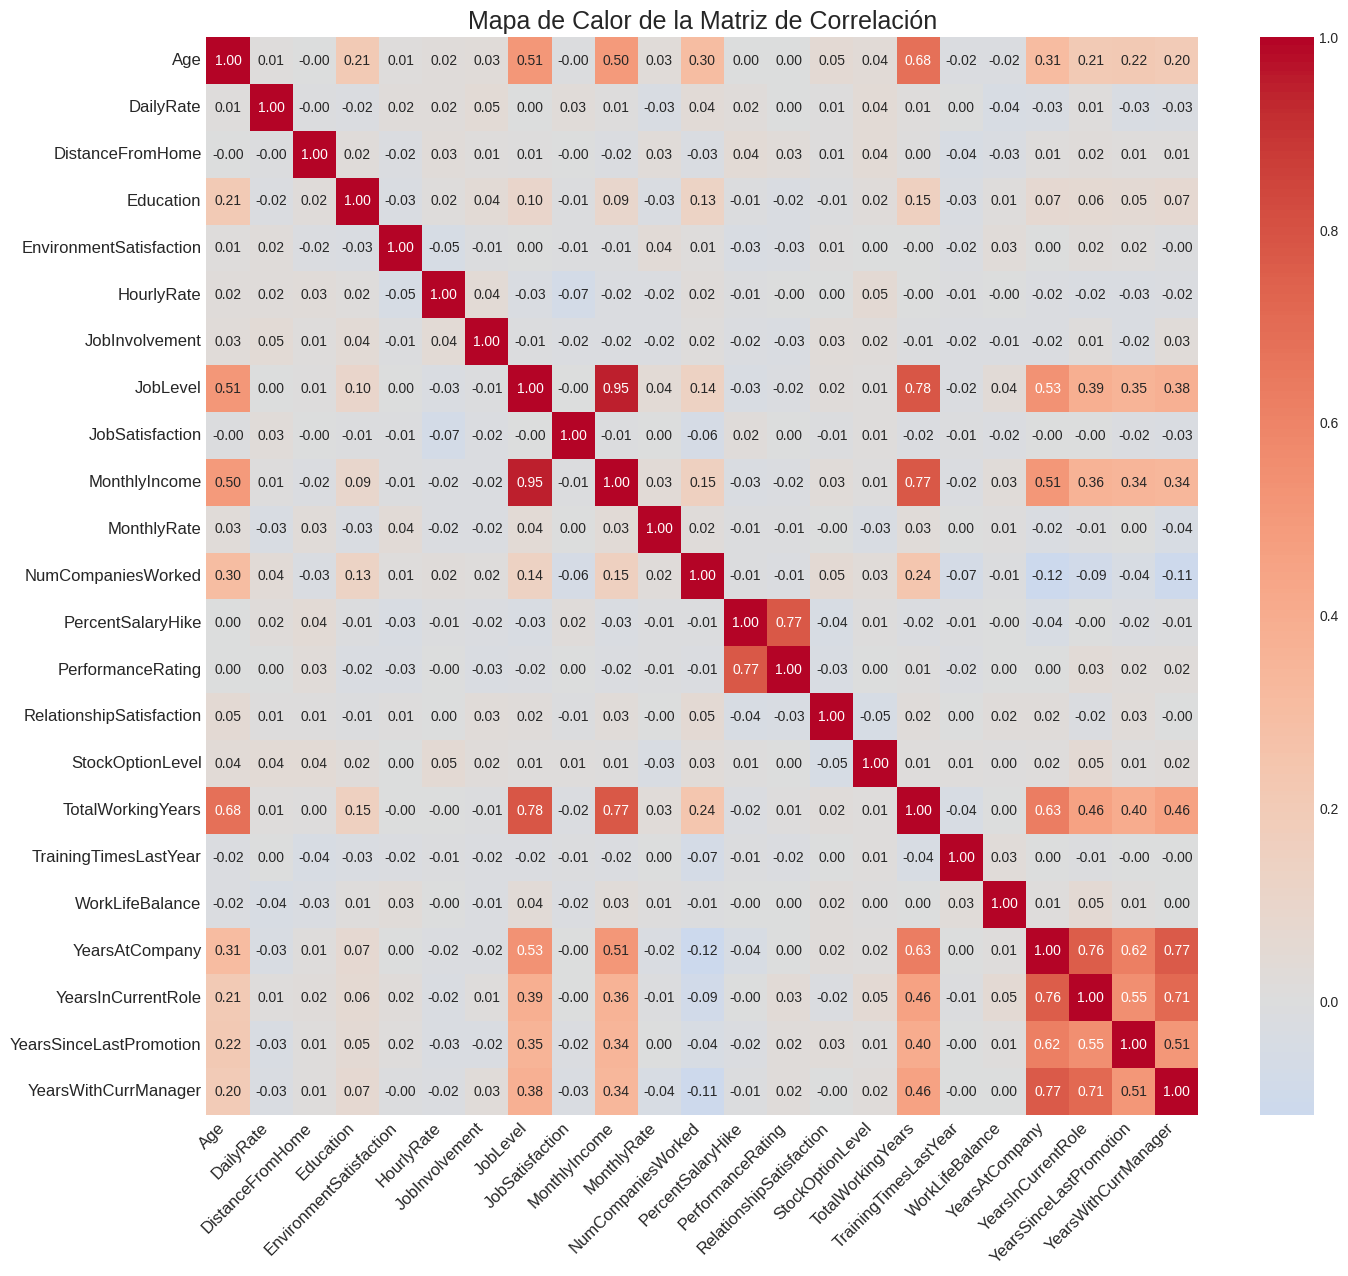

In [ ]:
numeric_columns = df.select_dtypes(include=['int64']).columns
numeric_columns.tolist()

correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(16, 14))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f", annot_kws={"size": 10})
plt.title('Mapa de Calor de la Matriz de Correlación', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.show()

In [ ]:
def safe_log(x):
    return np.log(x + 1)

numericas_pipeline = Pipeline([
  ('imputar', SimpleImputer(strategy='median')),
  ('log_scaler', FunctionTransformer(safe_log, validate=False)),
  ('std_scaler', StandardScaler())
])
numericas_pipeline_nombres = numeric_columns

catOHE_pipeline = Pipeline([
    ('one_hot', OneHotEncoder())
])
catOHE_pipeline_nombres = ['Gender', 'PerformanceRating','OverTime','Department','EducationField','JobRole','MaritalStatus']

catOrd_pipeline = Pipeline([
    ('ordinal', OrdinalEncoder(categories=[['Non-Travel','Travel_Frequently','Travel_Rarely']]))
])
catOrd_pipeline_nombres = ['BusinessTravel']

columnasTransformer = ColumnTransformer([
    ('numeric', numericas_pipeline, numericas_pipeline_nombres),
    ('categorical_one_hot', catOHE_pipeline, catOHE_pipeline_nombres),
    ('categorical_ordinal', catOrd_pipeline, catOrd_pipeline_nombres)
])


In [ ]:
modeloRL = LogisticRegression(max_iter=1000)

param_grid = {
    'modelorl__C': [0.01, 0.1, 1, 10, 100],
    'modelorl__solver': ['saga','liblinear']
}
pipelineRL = Pipeline(steps=[
    ('ct', columnasTransformer),
    ('modelorl', modeloRL)
])

pipelineRL = Pipeline(steps=[('ct',columnasTransformer),('modeloRL',modeloRL)])
pipelineRL.fit(Xtrain, np.ravel(ytrain))

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputar',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('log_scaler',
                                                                   FunctionTransformer(func=<function safe_log at 0x795319040670>)),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'J...
                                                 ('categorical_one_hot',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder())]),
                                                  ['Gender',
                                                   'PerformanceRating',
                                                   'OverTime', 'Department',
                                                   'EducationField', 'JobRole',
                                                   'MaritalStatus']),
                                                 ('categorical_ordinal',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder(categories=[['Non-Travel',
                                                                                               'Travel_Frequently',
                                                                                               'Travel_Rarely']]))]),
                                                  ['BusinessTravel'])])),
                ('modeloRL', LogisticRegression(max_iter=1000))])

In [ ]:
print(">>Exactitud (Accuracy) de los conjuntos de Entrenamiento y Validación:")
y_pred_trainRL = pipelineRL.predict(Xtrain)
y_pred_valRL = pipelineRL.predict(Xval)
print('accuracy-train', metrics.accuracy_score(ytrain, y_pred_trainRL))
print('accuracy-val', metrics.accuracy_score(yval, y_pred_valRL))

print("\n>>Matriz de Confusión:")
print(metrics.confusion_matrix(yval, y_pred_valRL))

print("\n>>Reporte varias métricas:")
print(metrics.classification_report(yval, y_pred_valRL))

>>Exactitud (Accuracy) de los conjuntos de Entrenamiento y Validación:
accuracy-train 0.9076773566569485
accuracy-val 0.8590909090909091

>>Matriz de Confusión:
[[179   6]
 [ 25  10]]

>>Reporte varias métricas:
              precision    recall  f1-score   support

          No       0.88      0.97      0.92       185
         Yes       0.62      0.29      0.39        35

    accuracy                           0.86       220
   macro avg       0.75      0.63      0.66       220
weighted avg       0.84      0.86      0.84       220



In [ ]:
pipeline_knn = Pipeline([
    ('preprocesamiento', columnasTransformer),
    ('knn', KNeighborsClassifier())
])
param_grid_knn = {
    'knn__n_neighbors': range(1,30),
    'knn__weights': ['uniform','distance'],
    'knn__metric': ['euclidean','manhattan']
}

grid_search = GridSearchCV(pipeline_knn, param_grid_knn, cv=5, verbose=1, scoring='accuracy')
grid_search.fit(Xtrain,ytrain)

best_knn = grid_search.best_estimator_

Fitting 5 folds for each of 116 candidates, totalling 580 fits


In [ ]:
print(">>Exactitud (Accuracy) de los conjuntos de Entrenamiento y Validación con KNN:")
y_pred_trainknn = best_knn.predict(Xtrain)
y_pred_valknn = best_knn.predict(Xval)
print('accuracy-train', metrics.accuracy_score(ytrain, y_pred_trainknn))
print('accuracy-val', metrics.accuracy_score(yval, y_pred_valknn))

print("\n>>Matriz de Confusión:")
print(metrics.confusion_matrix(yval, y_pred_valknn))

print("\n>>Reporte varias métricas:")
print(metrics.classification_report(yval, y_pred_valknn))

>>Exactitud (Accuracy) de los conjuntos de Entrenamiento y Validación con KNN:
accuracy-train 0.8600583090379009
accuracy-val 0.85

>>Matriz de Confusión:
[[184   1]
 [ 32   3]]

>>Reporte varias métricas:
              precision    recall  f1-score   support

          No       0.85      0.99      0.92       185
         Yes       0.75      0.09      0.15        35

    accuracy                           0.85       220
   macro avg       0.80      0.54      0.54       220
weighted avg       0.84      0.85      0.80       220



In [ ]:
modeloRL = LogisticRegression(max_iter=1000)

param_grid_smote = {
    'smote__k_neighbors': [3, 5, 7],
    'classifier__C': [0.01, 0.1, 1],
    'classifier__solver': ['liblinear', 'lbfgs']
}
pipeline_smote = ImbPipeline([
    ('preprocessing', columnasTransformer),
    ('smote', SMOTE(random_state=42, k_neighbors=3)),
    ('classifier', modeloRL)
    ]
)
grid_search_smote = GridSearchCV(pipeline_smote, param_grid_smote, cv=5, scoring='accuracy', verbose=1)

grid_search_smote.fit(Xtrain, np.ravel(ytrain))

best_smote = grid_search_smote.best_params_

Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [ ]:
print(">>Exactitud (Accuracy) de los conjuntos de Entrenamiento y Validación con SMOTE:")
y_pred_trainSMOTE = grid_search_smote.predict(Xtrain)
y_pred_valSMOTE = grid_search_smote.predict(Xval)
print('accuracy-train', metrics.accuracy_score(ytrain, y_pred_trainSMOTE))
print('accuracy-val', metrics.accuracy_score(yval, y_pred_valSMOTE))

print("\n>>Matriz de Confusión:")
print(metrics.confusion_matrix(yval, y_pred_valSMOTE))

print("\n>>Reporte varias métricas:")
print(metrics.classification_report(yval, y_pred_valSMOTE))

>>Exactitud (Accuracy) de los conjuntos de Entrenamiento y Validación con SMOTE:
accuracy-train 0.8046647230320699
accuracy-val 0.7727272727272727

>>Matriz de Confusión:
[[149  36]
 [ 14  21]]

>>Reporte varias métricas:
              precision    recall  f1-score   support

          No       0.91      0.81      0.86       185
         Yes       0.37      0.60      0.46        35

    accuracy                           0.77       220
   macro avg       0.64      0.70      0.66       220
weighted avg       0.83      0.77      0.79       220



In [ ]:
resultados_permutacion = permutation_importance(grid_search_smote.best_estimator_, Xval, yval,scoring='accuracy', n_repeats=15, random_state=42,n_jobs=-1)

importance_df = pd.DataFrame({
    'feature_names': Xtrain.columns,
    'importances_mean': resultados_permutacion.importances_mean
}).sort_values(by='importances_mean', ascending=False)

importance_df

,feature_names,importances_mean
18,OverTime,0.064848
17,NumCompaniesWorked,0.027879
28,YearsSinceLastPromotion,0.025758
23,TotalWorkingYears,0.013333
7,EnvironmentSatisfaction,0.012727
22,StockOptionLevel,0.012121
8,Gender,0.010303
14,MaritalStatus,0.007879
15,MonthlyIncome,0.005152
26,YearsAtCompany,0.004242


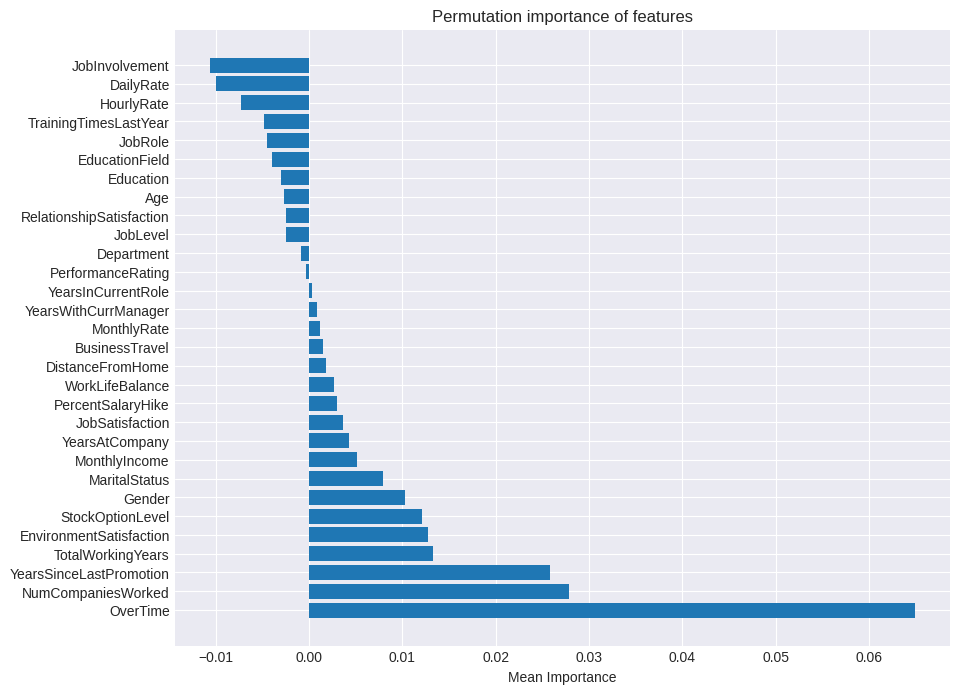

In [ ]:
plt.figure(figsize=(10,8))
plt.barh(importance_df['feature_names'], importance_df['importances_mean'])
plt.xlabel('Mean Importance')
plt.title('Permutation importance of features')
plt.show()

In [ ]:
X_train_combined = pd.concat((Xtrain, Xval), axis=0)
y_train_combined = np.hstack((ytrain, yval))

modeloRL = LogisticRegression(max_iter=1000)

param_grid_smote = {
    'smote__k_neighbors': [3, 5, 7],
    'classifier__C': [0.01, 0.1, 1],
    'classifier__solver': ['liblinear', 'lbfgs']
}
pipeline_smote = ImbPipeline([
    ('preprocessing', columnasTransformer),
    ('smote', SMOTE(random_state=42, k_neighbors=3)),
    ('classifier', modeloRL)
    ]
)
grid_search_smote = GridSearchCV(pipeline_smote, param_grid_smote, cv=5, scoring='accuracy', verbose=1)

grid_search_smote.fit(X_train_combined, y_train_combined)
best_model = grid_search_smote.best_estimator_

print(">>Exactitud (Accuracy) de los conjuntos de Entrenamiento y Validación con SMOTE:")
y_pred_train = best_model.predict(Xtrain)
y_pred_val = grid_search_smote.predict(Xval)
print('accuracy-train', metrics.accuracy_score(ytrain, y_pred_train))
print('accuracy-val', metrics.accuracy_score(yval, y_pred_val))

print("\n>>Matriz de Confusión:")
print(metrics.confusion_matrix(yval, y_pred_val))

print("\n>>Reporte varias métricas:")
print(metrics.classification_report(yval, y_pred_val))

Fitting 5 folds for each of 18 candidates, totalling 90 fits
>>Exactitud (Accuracy) de los conjuntos de Entrenamiento y Validación con SMOTE:
accuracy-train 0.7998056365403304
accuracy-val 0.8

>>Matriz de Confusión:
[[152  33]
 [ 11  24]]

>>Reporte varias métricas:
              precision    recall  f1-score   support

          No       0.93      0.82      0.87       185
         Yes       0.42      0.69      0.52        35

    accuracy                           0.80       220
   macro avg       0.68      0.75      0.70       220
weighted avg       0.85      0.80      0.82       220




#### Interpretación de las Métricas

1. **Precisión (Precision)**:
- **No**: 0.93
- **Yes**: 0.42

La precisión para "No" (los empleados que no rotarán) es alta (93%), lo cual indica que el modelo es muy bueno para evitar falsos positivos (empleados que se predice que rotarán, pero no lo harán). Sin embargo, la precisión para "Yes" (los empleados que rotarán) es baja (42%), lo cual sugiere que hay muchos falsos positivos en esta categoría.

2. **Recall (Sensibilidad o Tasa de Verdaderos Positivos)**:
- **No**: 0.82
- **Yes**: 0.69

El recall para "No" es 82%, indicando que el modelo es bastante bueno para identificar a los empleados que no rotarán. El recall para "Yes" es 69%, lo cual es moderado y sugiere que el modelo no identifica correctamente a todos los empleados que rotarán, pero tiene un desempeño razonable en esta tarea.

3. **F1-Score**:
- **No**: 0.87
- **Yes**: 0.52

El F1-score combina precisión y recall en una sola métrica, proporcionando un balance entre ambos. Para "No", el F1-score es alto (87%), indicando un buen equilibrio entre precisión y recall. Para "Yes", el F1-score es más bajo (52%), reflejando la dificultad del modelo para balancear precisión y recall en esta categoría.

#### Conclusión y Recomendaciones

- **Desempeño General**: El modelo tiene un buen desempeño general, con una alta precisión para identificar empleados que no rotarán y un moderado desempeño en identificar a aquellos que sí lo harán.
- **Mejoras Necesarias**: Para abordar mejor la rotación de empleados (clase "Yes"), se podrían explorar técnicas adicionales, como ajustar los pesos de las clases, utilizar diferentes algoritmos de clasificación, o realizar un análisis más detallado de las características que influyen en la rotación.
